# MAL 1 Final Project - Fall Detection

**Students:** Pietro Gadaleta, Francesco Stampini

In [1]:
# importing the libraries
import time
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import seaborn as sns
import string
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 1 Data Collection

In [2]:
# for importing in google colab
# from google.colab import drive
# drive.mount('/content/drive')
# data = pd.read_csv('/content/drive/MyDrive/falldataproject.csv')

data = pd.read_csv('falldataproject.csv')

Let us quickly observe data: 87 features, divided into raw, Fourier transform and derivatives:

In [3]:
data.head()

,obs,raw_feat_X1,raw_feat_X2,raw_feat_X3,raw_feat_X4,raw_feat_X5,raw_feat_X6,raw_feat_X7,raw_feat_X8,raw_feat_X9,...,deriv_feat_X21,deriv_feat_X22,deriv_feat_X23,deriv_feat_X24,deriv_feat_X25,deriv_feat_X26,deriv_feat_X27,deriv_feat_X28,deriv_feat_X29,FALL
0,0,0.249744,-0.162770,0.223727,0.393904,-0.154366,0.128968,1.090661,0.913849,0.505526,...,0.121241,0.734862,0.179370,0.402461,0.638393,0.344236,0.823239,-0.409350,1.425206,1
1,1,0.385843,-0.660978,-0.127798,-0.205710,-0.160936,0.111606,0.171391,2.889781,0.377333,...,-0.182778,0.357499,-0.056181,0.840313,0.605672,0.655029,1.052671,-0.177353,1.613721,1
2,2,3.344528,-4.535931,0.165140,-0.228745,3.203818,3.379462,1.089901,2.097552,0.877990,...,0.425260,8.093449,-0.684318,0.046744,3.440332,3.965586,2.916183,0.367674,3.952479,1
3,3,3.190676,-2.884463,-1.153080,-0.698292,1.868221,2.493077,2.546198,3.817391,3.711000,...,-4.743065,-0.774592,-1.076903,-0.818687,3.572430,3.409429,2.407953,1.233629,2.702845,1
4,4,2.338575,-2.699941,-0.069211,-0.025849,1.420714,2.137326,1.097388,2.101987,1.200319,...,-2.766941,0.168817,-1.116162,-1.640847,1.527936,2.215856,2.353429,0.721413,2.933661,1


Let us check statistics on data:

In [4]:
data.describe()

,obs,raw_feat_X1,raw_feat_X2,raw_feat_X3,raw_feat_X4,raw_feat_X5,raw_feat_X6,raw_feat_X7,raw_feat_X8,raw_feat_X9,...,deriv_feat_X21,deriv_feat_X22,deriv_feat_X23,deriv_feat_X24,deriv_feat_X25,deriv_feat_X26,deriv_feat_X27,deriv_feat_X28,deriv_feat_X29,FALL
count,2821.000000,2.821000e+03,2.821000e+03,2.821000e+03,2.821000e+03,2.821000e+03,2.821000e+03,2.821000e+03,2.821000e+03,2.821000e+03,...,2.821000e+03,2.821000e+03,2.821000e+03,2.821000e+03,2.821000e+03,2.821000e+03,2.821000e+03,2.821000e+03,2.821000e+03,2821.000000
mean,1410.000000,1.667207e-09,3.795496e-10,3.899275e-09,1.012218e-09,-1.859469e-10,8.210841e-10,-1.549027e-09,2.222061e-10,-4.717056e-10,...,-3.200372e-09,-2.909187e-09,5.263204e-09,-6.966069e-09,9.615325e-10,6.541429e-10,4.666482e-09,2.200017e-08,2.628659e-09,0.071606
std,814.496879,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.257880
min,0.000000,-6.556134e-01,-1.251649e+01,-9.179574e+00,-7.429472e+00,-3.358292e-01,-7.739324e-01,-5.607134e+00,-7.696240e-01,-1.220157e+01,...,-1.203952e+01,-4.925589e+00,-1.626523e+00,-1.640847e+00,-4.717174e-01,-4.578115e-01,-1.453174e+00,-1.079262e+00,-1.429270e+00,0.000000
25%,705.000000,-4.307534e-01,-3.360438e-02,-4.207358e-01,-3.913882e-01,-3.254221e-01,-5.906837e-01,-6.110919e-01,-4.714865e-01,-3.361604e-01,...,-3.076833e-02,-3.972282e-01,-8.413519e-01,-7.501742e-01,-4.111218e-01,-3.981856e-01,-8.334801e-01,-1.079262e+00,-6.482631e-01,0.000000
50%,1410.000000,-3.242407e-01,3.446649e-01,4.796453e-02,4.302406e-02,-2.970101e-01,-3.810222e-01,-9.745396e-02,-2.983617e-01,-1.730300e-01,...,1.212412e-01,-2.085465e-01,-2.132152e-01,-3.763596e-02,-3.044736e-01,-3.121766e-01,-2.040076e-01,-3.182769e-02,-3.324688e-01,0.000000
75%,2115.000000,-8.754601e-02,5.199604e-01,4.580773e-01,4.341580e-01,-1.696682e-01,8.801807e-02,4.586932e-01,-1.885279e-03,3.140814e-02,...,4.252604e-01,1.688170e-01,8.467654e-01,6.700878e-01,-1.372299e-01,-1.538778e-01,5.182496e-01,5.495999e-01,2.615398e-01,0.000000
max,2820.000000,1.310227e+01,8.797775e-01,4.149093e+00,5.424897e+00,2.706610e+01,1.087081e+01,4.899731e+00,8.533954e+00,8.310348e+00,...,1.945356e+00,1.205576e+01,3.241536e+00,3.489428e+00,1.226668e+01,1.303611e+01,3.997984e+00,4.653876e+00,4.192527e+00,1.000000


Since the mean value of the target variable "FALL" is 0.0716, we can deduce the '1' class ("fall has taken place") is way under-represented, thus making the dataset unbalanced.


This may lead to problems when generalizing (for instance, when predicting a class/classifying unseen observations). The algorithm will receive significantly more examples from one class, propting it to be biased towards that particular class. It does not learn what makes the other class different, and therefore fails to understand the underlying patterns that allow us to distinguish classes.

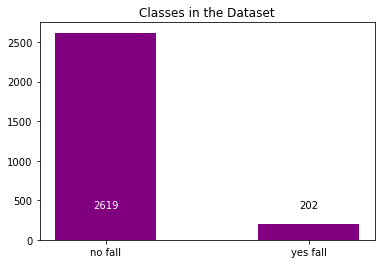

In [5]:
# Subplot
fig,ax = plt.subplots(1,1)
ax.hist(data.FALL, bins=3, align='mid',color='purple');
labels = ['no fall', 'yes fall']
ax.set_xticks([1/6,5/6])
ax.set_xticklabels(labels);
ax.set_title('Classes in the Dataset');
# number of zeros
plt.text(1/6,400,data.groupby('FALL').count().iloc[0,0],ha='center',c='white');
# number of ones
plt.text(5/6,400,data.groupby('FALL').count().iloc[1,0],ha='center',c='black');

We will solve the issue of unbalanced classes using an oversampling technique, i.e. the **SMOTE** (Synthetic Minority Over-Sampling Technique) Algorithm.

# 2 Feature Selection

We start creating the matrix with the observations $X$ and the vector of labels $y$.

In [6]:
data = data.drop(['obs'], axis = 1) # delete the observation number from the data

X = data.loc[:, data.columns != 'FALL'] # features dataframe
y = data.loc[:, data.columns == 'FALL'] # labels

# numpy transformation
X = X.to_numpy();
y = y.to_numpy();
y = np.concatenate(y);

# number of features = [2:5]
nmaxvars = 5;



To solve the problem of imbalanced classes, we will be using the SMOTE algorithm. Here is the code just for a explicative purposes; we will never use again the oversampled complete dataset but we will apply SMOTE directly on the training set in later stages.

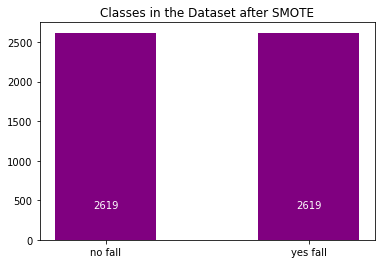

In [7]:
# SMOTE algorithm
oversample = SMOTE(sampling_strategy='not majority', k_neighbors=5)
X_smote, y_smote = oversample.fit_resample(X, y) # using the function smote
# scaling features:
for i in range(len(X[0])):
    X_smote[:,i] = (X_smote[:,i]-np.mean(X_smote[:,i]))/np.std(X_smote[:,i]);
# Subplot
fig,ax = plt.subplots(1,1)
ax.hist(y_smote, bins=3, align='mid',color='purple');
labels = ['no fall', 'yes fall']
ax.set_xticks([1/6,5/6])
ax.set_xticklabels(labels);
ax.set_title('Classes in the Dataset after SMOTE');
# number of zeros
plt.text(1/6,400,np.sum(y_smote),ha='center',c='white');
# number of ones
plt.text(5/6,400,len(y_smote)-np.sum(y_smote),ha='center',c='white');

**We now start performing different Feature Selection algorithms in order to select variables to use as inputs for the training stage.**

For each method, we also define a function we will later use inside the K-Fold cross validation process.

## 2.1 Random Forest Classifier for Feature Selection
This technique consists in considering the individual features’ importances according to how they reduce impurity – on average with respect to all the decision trees that make up the Random Forest.

Elapsed time to compute the importances: 0.010 seconds


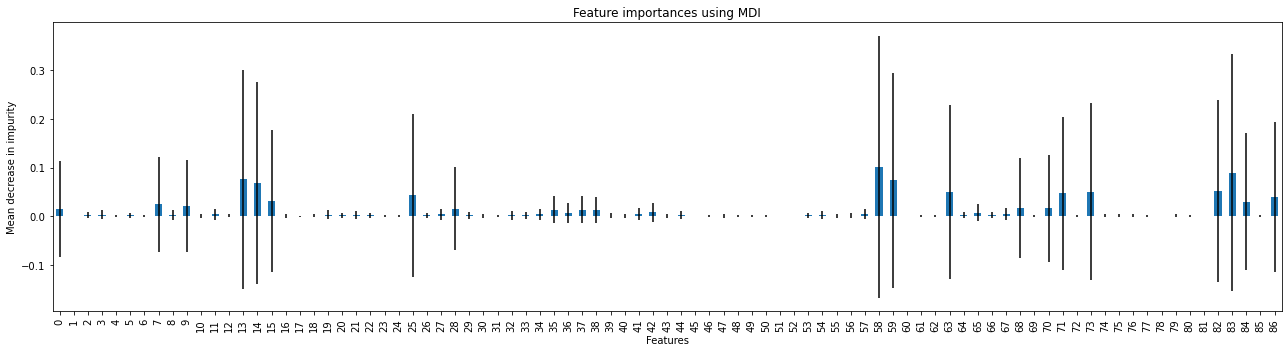

In [8]:
from sklearn.ensemble import RandomForestClassifier

# model classifier
rf = RandomForestClassifier(n_estimators=50, max_depth=5,
                                 bootstrap=True, n_jobs=-1,
                                 random_state=0)
rf.fit(X, y)

start_time = time.time() # counting time

importances = rf.feature_importances_ # using the attribute feature_importances_ to select the most important features 

std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0) # standard deviation
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

# Plotting the results as bar plot
d = {'mean': importances,'number': range(X.shape[1])}
df = pd.DataFrame(data=d)
forest_importances = pd.Series(importances)
fig, ax = plt.subplots(figsize=(18,5))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI") # mean decrease in impurity
ax.set_ylabel("Mean decrease in impurity")
ax.set_xlabel('Features')
fig.tight_layout()

In [9]:
df = pd.DataFrame(data=d)
df = df.sort_values('mean', ascending = False) # sorting the features for importance
print(df)
features_RF = np.array(df.number[0:nmaxvars])
print("The most important features are ", features_RF)
X_RF = X[:, features_RF] # new dataset of just #nmaxvar features

        mean  number
58  0.101692      58
83  0.089565      83
13  0.075827      13
59  0.073465      59
14  0.068286      14
..       ...     ...
1   0.000049       1
45  0.000000      45
52  0.000000      52
51  0.000000      51
60  0.000000      60

[87 rows x 2 columns]
The most important features are  [58 83 13 59 14]


In [10]:
# Defining the function Random Forest features selection, we will apply this function directly on the training set at each iteration of the K-fold.
# It finds the #nvars most important features according to Random Forest Classifier

# INPUT:
# X_train: Training set
# y_train: traing set labels
# X_test : Test set
# nvars  : number of features to select

# OUTPUT:
# X_RFE_train. : Training set consisting of just the selected features 
# X_RFE_test   : Test set consisting of just the selected features
# rfe_features : selected features 

def rf_selection(X_train, y_train, X_test, nvars):

    # model classifier
    rf = RandomForestClassifier(n_estimators=50, max_depth=5,
                                    bootstrap=True, n_jobs=-1,
                                    random_state=0)
    rf.fit(X_train, y_train)

    importances = rf.feature_importances_ # using the attribute feature_importances_ to select the most important features 

    std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0) # standard deviation

    # Plotting the results as bar plot
    d = {'mean': importances,'number': range(X_train.shape[1])}
    df = pd.DataFrame(data=d)
    df = df.sort_values('mean', ascending = False) # sorting the features for importance
    features_RF = np.array(df.number[0:nvars])
    
    X_RF_train = X_train[:, features_RF] # new dataset of just #nvar features
    X_RF_test = X_test[:, features_RF]

    return X_RF_train, X_RF_test, features_RF

## 2.2 Random Forest with Permutation Importance
This is just a variant of the previous model; it uses Permutation Feature Importance instead of the mean decrease in impurity, i.e. the decrease in a model score when the value of a single feature is randomly shuffled. This technique benefits from being model agnostic and can be computed several times with different permutations of the feature 

Elapsed time to compute the importances: 7.283 seconds


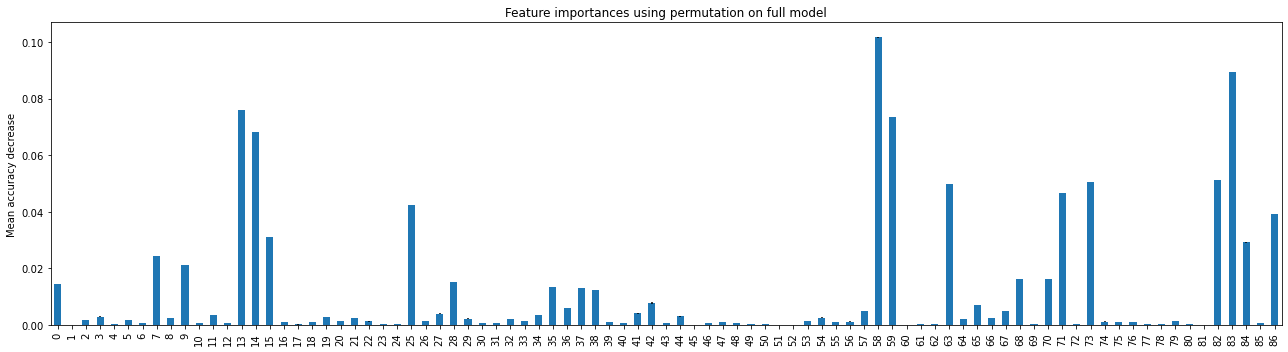

In [11]:
#Using Permutation Importance
from sklearn.inspection import permutation_importance
# link: https://scikit-learn.org/stable/modules/permutation_importance.html#permutation-importance

start_time = time.time()
result = permutation_importance(rf, X, y, n_repeats=4) # using the function permutation importance from sklearn
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")


d = {'mean': importances,'number': range(X.shape[1])}
df = pd.DataFrame(data=d)
forest_importances = pd.Series(importances)

# plot bar
fig, ax = plt.subplots(figsize=(18,5))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [12]:
df = pd.DataFrame(data=d)
df = df.sort_values('mean',ascending = False) # sorting the features for importance
print(df)
features = np.array(df.number[0:nmaxvars])
print("The most important features (according to RF with permutations) are:", features) 

# same features as the RF w/o permutations:
X_RF = X[:, features] # new dataset of features selected using RF methods.

        mean  number
58  0.101692      58
83  0.089565      83
13  0.075827      13
59  0.073465      59
14  0.068286      14
..       ...     ...
1   0.000049       1
45  0.000000      45
52  0.000000      52
51  0.000000      51
60  0.000000      60

[87 rows x 2 columns]
The most important features (according to RF with permutations) are: [58 83 13 59 14]


## 2.3 Recursive Feature Elimination
 

This feature selection algorithm, which we paired to a Decision Tree classifier, reduces model complexity by removing features, one at each iteration, until we reach the amount of features requested.

In [13]:
from sklearn.feature_selection import RFE
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

estimator = DecisionTreeClassifier() # estimator of RFE
X_cycle = X

for i in range(4):
  rfe = RFE(estimator, n_features_to_select= nmaxvars-i, step=1)# RFE technique
  rfe = rfe.fit(X_cycle, y)
  if i==0:
    rfe_features = list(j for j in range(len(rfe.ranking_)) if rfe.ranking_[j] == 1) # selection of the most important features for the RFE methods.
    features_cycle = rfe_features
    print("The most important features each cycle to RFE are:", features_cycle);  
  else:
    features_cycle = list(j for j in range(len(rfe.ranking_)) if rfe.ranking_[j] == 1) # selection of the most important features for the RFE methods.
    pos = (set(range(nmaxvars)) - set(features_cycle)).pop()
    elem = rfe_features[pos]
    rfe_features.remove(elem)
    rfe_features.insert(nmaxvars-i,elem)
    print("The most important features each cycle to RFE are:", features_cycle);

  
  X_cycle = X[:, features_cycle] # new dataset of features selected using RFE methods.

print("The most important features according to RFE are:", rfe_features);
X_RFE = X[:, rfe_features]

The most important features each cycle to RFE are: [12, 35, 66, 71, 82]
The most important features each cycle to RFE are: [0, 1, 3, 4]
The most important features each cycle to RFE are: [0, 2, 3]
The most important features each cycle to RFE are: [0, 2]
The most important features according to RFE are: [12, 82, 71, 35, 66]


In [14]:
# Defining the function 'Recursive features elimination' selection, we will apply this function directly on the training set at each iteration of the K-fold.
# It finds the #nvars most important features according to RFE algorithm

# INPUT:
# X_train: Training set
# y_train: traing set labels
# X_test : Test set
# nvars  : number of features to select

# OUTPUT:
# X_RFE_train. : Training set consisting of just the selected features 
# X_RFE_test   : Test set consisting of just the selected features
# rfe_features : selected features 

def rfe_selection(X_train, y_train, X_test, nvars):
    estimator = DecisionTreeClassifier() # estimator of RFE
    
    rfe = RFE(estimator, n_features_to_select= nvars, step=1)# RFE technique
    rfe = rfe.fit(X_train, y_train)
    rfe_features = list(j for j in range(len(rfe.ranking_)) if rfe.ranking_[j] == 1) # selection of the most important features for the RFE methods.
    X_RFE_train = X_train[:, rfe_features] 
    X_RFE_test = X_test[:, rfe_features]

    return X_RFE_train, X_RFE_test, rfe_features

## 2.4 Logistic Regression 
This method takes advantage of ‘L1’ penalisation to remove redundant features. Lasso regression in fact turns coefficient of redundant features to zero due to regularization. Once we get the coefficients of the trained model, we then sort them and pick the features with the five highest coefficients in absolute value.

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Train a LR model with best parameters
model = LogisticRegression( penalty='l1', solver='liblinear')
model.fit(X, y)

coef = np.argsort(abs(model.coef_[0]))[::-1]
features_LR = coef[0:nmaxvars] # selection of the most important features for the LR methods.
print("The most important features according to LR are:", features_LR);
X_LR = X[:, features_LR] # new dataset of features selected using LR methods.

The most important features according to LR are: [59 19 63 28 41]


In [16]:
# Defining the function 'Logistic Regression' selection, we will apply this function directly on the training set at each iteration of the K-fold.
# It finds the #nvars most important features according to Logistic Regression classifier

# INPUT:
# X_train: Training set
# y_train: traing set labels
# X_test : Test set
# nvars  : number of features to select

# OUTPUT:
# X_RFE_train. : Training set consisting of just the selected features 
# X_RFE_test   : Test set consisting of just the selected features
# rfe_features : selected features

def lr_selection(X_train, y_train, X_test, nvars):
    # Train a LR model with best parameters
    model = LogisticRegression( penalty='l1', solver='liblinear')
    model.fit(X_train, y_train)

    coef = np.argsort(abs(model.coef_[0]))[::-1]
    features_LR = coef[0:nvars] # selection of the most important features for the LR methods.
    X_LR_train = X_train[:, features_LR] # new dataset of features selected using LR methods.
    X_LR_test = X_test[:, features_LR]

    return X_LR_train, X_LR_test, features_LR

## 2.5 PCA
We eventually try using PCA, always with the aim of reducing the problem’s dimensionality; despite that, we lose the model’s interpretability since we are transforming all features. Again, we keep up to 5 components.

In [17]:
from sklearn.decomposition import PCA

# using the PCA to reduct the dimensionality of the problem
pca = PCA(n_components = nmaxvars, random_state = 1)
X_pca = pca.fit_transform(X) # new dataset

#scaling components
for i in range(len(X_pca[0])):
  X_pca[:,i] = (X_pca[:,i]-np.mean(X_pca[:,i]))/np.std(X_pca[:,i]);
  
print("Variance ratio explained by PCA using " + str(nmaxvars) + " components is: "
 + str(sum(pca.explained_variance_ratio_)))

Variance ratio explained by PCA using 5 components is: 0.7102496029171591


In [18]:
# Defining the function 'Principal Component analysis' selection, we will apply this function directly on the training set at each iteration of the K-fold.
# It extracts #nvars new features according to Principal Component analysis algorithm

# INPUT:
# X_train: Training set
# y_train: traing set labels
# X_test : Test set
# nvars  : number of features to select

# OUTPUT:
# X_RFE_train. : Training set consisting of just the selected features 
# X_RFE_test   : Test set consisting of just the selected features
# rfe_features : selected features

def pca_selection(X_train, y_train, X_test, nvars):
    # using the PCA to reduct the dimensionality of the problem
    pca = PCA(n_components = nvars, random_state = 5)
    X_pca_train = pca.fit_transform(X_train) # new dataset
    X_pca_test = pca.transform(X_test)

    #scaling components tr
    for i in range(len(X_pca_train[0])):
      #scaling training set
      X_pca_train[:,i] = (X_pca_train[:,i]-np.mean(X_pca_train[:,i]))/np.std(X_pca_train[:,i]);
      #scaling test set on training means and standard deviations
      X_pca_test[:,i] = (X_pca_test[:,i]-np.mean(X_pca_train[:,i]))/np.std(X_pca_train[:,i]);
    

    return X_pca_train, X_pca_test

## Plotting Pairs

We plot pairs to analyse correlation/collinearity between pairs of variables selected within the same feature selection algorithm and for pairs of variables selected with two different methods.

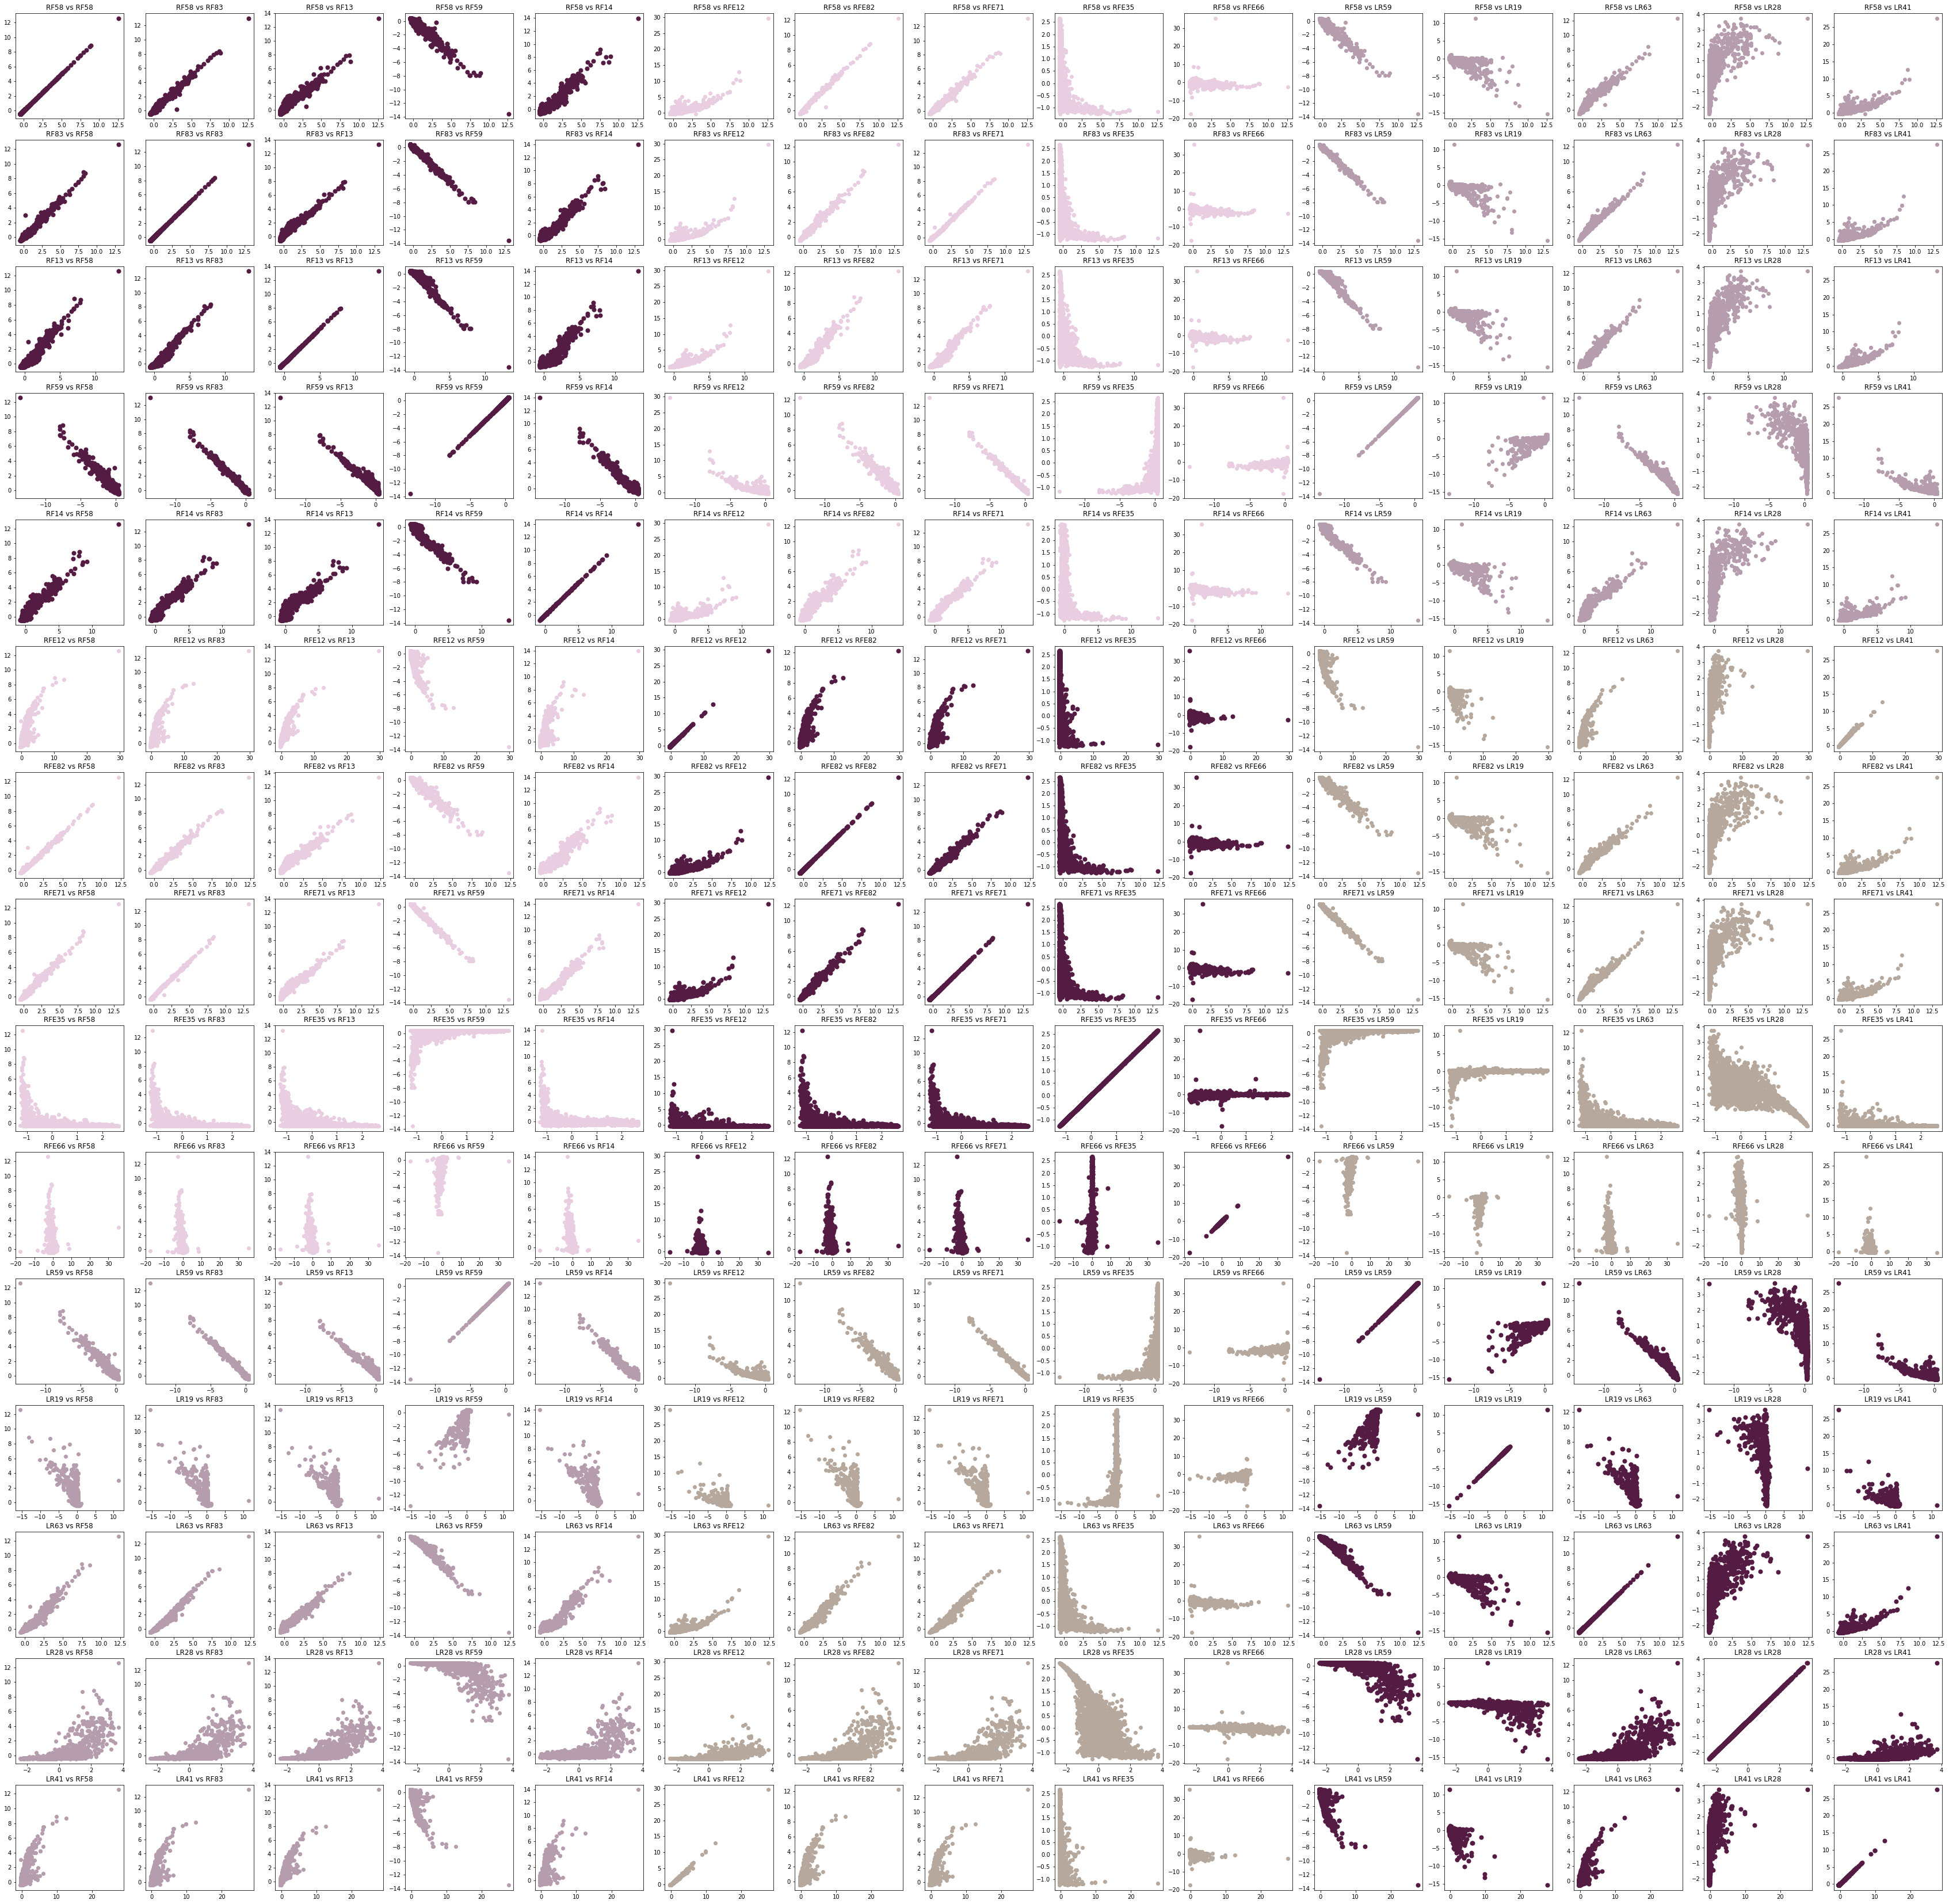

In [19]:
# Making this plot to analyse the correlation/collinearity between all the features selected
X_mainfeatures= np.concatenate((X_RF, X_RFE, X_LR),axis=1)
mainlabels=list(features_RF)+rfe_features+list(features_LR)
whatfs = 5*['RF']+5*['RFE']+5*['LR']

fig = plt.figure(figsize=[60,60])

for i in range(15):
    for j in range(15):
      plt.subplot(15,15,15*i+j+1)
      if (whatfs[i]==whatfs[j]):
        plt.scatter(X_mainfeatures[:,i],X_mainfeatures[:,j],color='#541B43',linewidths=2)
        plt.title(str(whatfs[i])+str(mainlabels[i])+" vs "+str(whatfs[j])+str(mainlabels[j]))
      else:
        if (whatfs[i]=='RF' and whatfs[j]=='RFE' or whatfs[i]=='RFE' and whatfs[j]=='RF'):
          couleur = '#E9CEE2'
        if (whatfs[i]=='RFE' and whatfs[j]=='LR' or whatfs[i]=='LR' and whatfs[j]=='RFE'):
          couleur = '#B6A89D'
        if (whatfs[i]=='RF' and whatfs[j]=='LR' or whatfs[i]=='LR' and whatfs[j]=='RF'):
          couleur = '#B69DAE'
        plt.scatter(X_mainfeatures[:,i],X_mainfeatures[:,j],color=couleur)
        plt.title(str(whatfs[i])+str(mainlabels[i])+" vs "+str(whatfs[j])+str(mainlabels[j]))
        

# 3 Model Analysis

In [20]:
# importing libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import string
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate


## Function Definition

### Scores Functions

In [21]:
import warnings
warnings.filterwarnings("ignore")

# Defining the function Cross-Validation Scores SMOTE: this function calculates the principal scores of each classifier using 
# the Stratified K-Fold algorithm. Before applying the K-fold, it will use a Feature Selection method, decided in the string "name",
# on the training set and then the SMOTE algorithm, this just on the training set. It will return a dictionary object 
# with all the scores (accuracy, precision, recall, F1, F2, AUC). Moreover it will print every result on the Output at each 
# iterations and at the end it will print the best Classifier for every score.

# INPUT:
# X_ds   : complete dataset
# y      : labels of the complete dataset
# models : vectors of strings with all the classifier technique to apply on the reduced datset
# name   : name of the features selection method, you can choose by PCA, Random Forest, RFE, Logistic Regression 
# Smote  : True if you want to apply the SMOTE algorithm, False otherwise. By default is equal to True

# OUTPUT:
# scores    : dictionary with all the scores values
# time_eval : vector of the time evaluation result for each model
# labels    : array used for the next function boxplot

def cval_scores_SMOTE(X_ds, y, models, name, Smote=True):
    
    # we are using this function to perform cross-validation using the SMOTE dataset.
  
    # dictionary with the scores
    scores = {"accuracy": [], "recall": [], "precision": [], "f1-score": [], "auc": [], "f2-score": []}
    
    # initializing the vectors
    time_eval = []
    labels    = []; # string vector with labels, used for the box-plot

    print("** Feature Selection using", name)
    print(" ")

    scores_name = ['accuracy','recall','precision','f1-score','auc','f2-score']
    best_scores = {'Scores' : ["accuracy","recall","precision","f1-score","auc","f2-score"],
                   'Mean Value': np.zeros(len(scores)), 'Model':["Noone","Noone","Noone","Noone","Noone","Noone"], 'Number features': np.zeros(len(scores))}
    Best_scores_df = pd.DataFrame(data=best_scores)

    for nvars in range(1,nmaxvars): # from 2 to 5 variables 
    
        for i in range(len(models)): # ranging models
      
            # select model model
            start_time = time.time() # starting the time
            model_cv = models[i]
            
            labels.append(type(models[i]).__name__ + " with " + str(nvars+1) + " features")
            
            cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 10)
            scores_cv = {"accuracy": [], "recall": [], "precision": [], "f1-score": [], "auc": [], "f2-score":[]}

            # cross-validating manually: we need to perform SMOTE and FEATURE SELECTION for each training set.
            for train_idx, test_idx in cv.split(X,y):
                X_tr, y_tr = X[train_idx], y[train_idx]
                X_te, y_te = X[test_idx], y[test_idx]
                
                #### performing FEATURE SELECTION #####
                if(name=="Random Forest"):
                  X_tr, X_te, _ = rf_selection(X_tr,y_tr,X_te,nvars+1)
                if(name=="RFE"):
                  X_tr, X_te, _ = rfe_selection(X_tr,y_tr,X_te,nvars+1)
                if(name=="Logistic Regression"):
                  X_tr, X_te, _ = lr_selection(X_tr,y_tr,X_te,nvars+1)
                if(name=="PCA"):
                  X_tr, X_te = pca_selection(X_tr,y_tr,X_te,nvars+1)

                if Smote==True: 
                  #### using SMOTE in the training dataset ####
                  sm = SMOTE(sampling_strategy='not majority', k_neighbors=5, random_state = 11)
                  # oversampled training sets:
                  X_tr, y_tr = sm.fit_resample(X_tr, y_tr)
                  
                mdl = model_cv
                # training model
                mdl.fit(X_tr, y_tr)
                y_pred = mdl.predict(X_te)
                
                # CV scores
                scores_cv['accuracy'].append(metrics.accuracy_score(y_te, y_pred))
                scores_cv['precision'].append(metrics.precision_score(y_te,y_pred))
                scores_cv['recall'].append(metrics.recall_score(y_te,y_pred))
                scores_cv['f1-score'].append(metrics.f1_score(y_te,y_pred))
                scores_cv["auc"].append(metrics.roc_auc_score(y_te,y_pred))
                scores_cv['f2-score'].append(metrics.fbeta_score(y_te,y_pred,beta=2))
                
            # printing results
            print("Number of variables: ", nvars+1)
            print("Model: ", type(models[i]).__name__)

            scores['accuracy'].append(scores_cv['accuracy'])
            scores['precision'].append(scores_cv['precision'])
            scores['recall'].append(scores_cv['recall'])
            scores['f1-score'].append(scores_cv['f1-score'])
            scores['auc'].append(scores_cv['auc'])
            scores['f2-score'].append(scores_cv['f2-score'])

            # report performance
            if Smote==True:
              print("Using the SMOTE function in the training set")
            else :
              print("Not using the SMOTE function in the training set")
            print('Accuracy test: %.3f (%.3f)' % (np.mean(scores_cv['accuracy']), np.std(scores_cv['accuracy'])))
            print('Precision test: %.3f (%.3f)' % (np.mean(scores_cv['precision']), np.std(scores_cv['precision'])))
            print('Recall test: %.3f (%.3f)' % (np.mean(scores_cv['recall']), np.std(scores_cv['recall'])))
            print('F1-score test: %.3f (%.3f)' % (np.mean(scores_cv['f1-score']), np.std(scores_cv['f1-score'])))
            print('Auc test: %.3f (%.3f)' % (np.mean(scores_cv['auc']), np.std(scores_cv['auc'])))
            print('F2-score test: %.3f (%.3f)' % (np.mean(scores_cv['f2-score']), np.std(scores_cv['f2-score'])))
      
            elapsed_time = time.time() - start_time
            time_eval.append(elapsed_time)
            print(f"Elapsed time to compute the prediction: "
            f"{elapsed_time:.3f} seconds")
            print(" ")
            
            # Comparing the score and then saving the best score 
            if np.mean(scores_cv['accuracy'])>Best_scores_df['Mean Value'][0]:
                Best_scores_df['Mean Value'][0]=np.mean(scores_cv['accuracy'])
                Best_scores_df['Model'][0]=  type(models[i]).__name__
                Best_scores_df['Number features'][0]= nvars+1
            if np.mean(scores_cv['recall'])>Best_scores_df['Mean Value'][1]:
                Best_scores_df['Mean Value'][1]=np.mean(scores_cv['recall'])
                Best_scores_df['Model'][1]=  type(models[i]).__name__
                Best_scores_df['Number features'][1]= nvars+1
            if np.mean(scores_cv['precision'])>Best_scores_df['Mean Value'][2]:
                Best_scores_df['Mean Value'][2]=np.mean(scores_cv['precision'])
                Best_scores_df['Model'][2]=  type(models[i]).__name__
                Best_scores_df['Number features'][2]= nvars+1
            if np.mean(scores_cv['f1-score'])>Best_scores_df['Mean Value'][3]:
                Best_scores_df['Mean Value'][3]=np.mean(scores_cv['f1-score'])
                Best_scores_df['Model'][3]=  type(models[i]).__name__
                Best_scores_df['Number features'][3]= nvars+1
            if np.mean(scores_cv['auc'])>Best_scores_df['Mean Value'][4]:
                Best_scores_df['Mean Value'][4]=np.mean(scores_cv['auc'])
                Best_scores_df['Model'][4]=  type(models[i]).__name__
                Best_scores_df['Number features'][4]= nvars+1
            if np.mean(scores_cv['f2-score'])>Best_scores_df['Mean Value'][5]:
                Best_scores_df['Mean Value'][5]=np.mean(scores_cv['f2-score'])
                Best_scores_df['Model'][5]=  type(models[i]).__name__
                Best_scores_df['Number features'][5]= nvars+1

            print("-"*52)
   
    print(" ")
    # Printing the best score 
    for k in range(len(scores_name)):
      print('The Best Model for '+ str(Best_scores_df['Scores'][k])+' is '+str(Best_scores_df['Model'][k])
            +' with '+ str(Best_scores_df['Number features'][k])+ ' number of features with a score of '
             +str(round(Best_scores_df['Mean Value'][k],5)))
    print(" ")
                                      
    return scores, time_eval, labels

### Boxplots

In [22]:
######### BOX PLOT FUNCTION
# defining the function boxplot score: it prints the scores obtained in the function Cross-Validation Scores SMOTE,
# you can select the score to plot, if you write 'All' the function will plot all the scores in the same boxplot

# INPUT:
# scores    : dictionary with all the scores values
# labels    : array used for the next function boxplot
# plot      : string with the name of the score to plot, 'accuracy', 'precision',  'f1', 'f2', 'recall', 'auc',
#              by default it plot all the scores in the same boxplot

def boxplot_score(scores, labels, nmaxvars, plot='All'):
  
  if (plot=='All'):
    f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, sharey=True, figsize=(35,10))

   
    # accuracy box-plot
    data = scores["accuracy"]
    ax1.set_title('Accuracy score on Test Dataset using K-Fold')
    ax1.boxplot(data, medianprops=dict(color='purple'))
    ax1.set_xticklabels(labels, fontdict=None, minor=False, rotation=90)
    ax1.yaxis.grid()
    xposition = [int(len(labels)/(nmaxvars-1))*i+.5 for i in range((nmaxvars-1))]
    for xc in xposition:
      ax1.axvline(x=xc, color='sandybrown', linestyle='--')
  
    # precision box-plot
    data = scores["precision"]
    ax2.set_title('Precision Score on Test Dataset using K-Fold')
    ax2.boxplot(data, medianprops=dict(color='purple'))
    ax2.set_xticklabels(labels, fontdict=None, minor=False, rotation=90)
    ax2.yaxis.grid()
    xposition = [int(len(labels)/(nmaxvars-1))*i+.5 for i in range((nmaxvars-1))]
    for xc in xposition:
      ax2.axvline(x=xc, color='sandybrown', linestyle='--')
  
    # recall box-plot
    data = scores["recall"]
    ax3.set_title('Recall Score on Test Dataset using K-Fold')
    ax3.boxplot(data, medianprops=dict(color='purple'))
    ax3.set_xticklabels(labels, fontdict=None, minor=False, rotation=90)
    ax3.yaxis.grid()
    xposition = [int(len(labels)/(nmaxvars-1))*i+.5 for i in range((nmaxvars-1))]
    for xc in xposition:
      ax3.axvline(x=xc, color='sandybrown', linestyle='--')
  
    # f2 box-plot
    data = scores["f2-score"]
    ax4.set_title('F2 Score on Test Dataset using K-Fold')
    ax4.boxplot(data, medianprops=dict(color='purple'))
    ax4.yaxis.grid()
    ax4.set_xticklabels(labels, fontdict=None, minor=False, rotation=90)
    xposition = [int(len(labels)/(nmaxvars-1))*i+.5 for i in range((nmaxvars-1))]
    for xc in xposition:
      ax4.axvline(x=xc, color='sandybrown', linestyle='--')
  
    # auc curve score box-plot
    data = scores["auc"]
    ax5.set_title('AUC Score on Test Dataset using K-Fold')
    ax5.boxplot(data, medianprops=dict(color='purple'))
    ax5.set_xticklabels(labels, fontdict=None, minor=False, rotation=90)
    ax5.yaxis.grid()
    xposition = [int(len(labels)/(nmaxvars-1))*i+.5 for i in range((nmaxvars-1))]
    for xc in xposition:
      ax5.axvline(x=xc, color='sandybrown', linestyle='--')
  
  # plotting one performance measure only
  elif(plot=='accuracy' or plot=='recall' or plot=='precision' or plot=='auc' or plot=='f1' or plot=='f2-score'):
    f, ax = plt.subplots(1, 1, figsize=(10,5))
    data = scores[plot]
    ax.set_title(plot+' score on Test Dataset using K-Fold')
    ax.boxplot(data, medianprops=dict(color='purple'))
    ax.set_xticklabels(labels, fontdict=None, minor=False, rotation=90)
    ax.yaxis.grid()
    xposition = [int(len(labels)/(nmaxvars-1))*i+.5 for i in range((nmaxvars-1))]
    for xc in xposition:
      ax.axvline(x=xc, color='sandybrown', linestyle='--')
  
  else: 
    raise ValueError("Plot value not admissible")

  f.figure # plotting the final figure


## Main
We start by choosing ML models to train using our dataset:
- Gaussian Naive Bayes
- Logistic Regression
- Decision Tree
- ExtraTree
- Random Forest

In [23]:
# classification models
models = [GaussianNB(), LogisticRegression(random_state=12), DecisionTreeClassifier(random_state=13), ExtraTreesClassifier(random_state = 14), RandomForestClassifier(random_state = 15)]

### RF with tuning w/o feature Selection
Before training the models above using the reduced datasets, we make an attempt to train a Random Forest using all variables. Results are just as good as for some models when using a very restricted amount of features, so we won't need to use all of them. We also perform tuning in order to find the optimal parameters for the Random Forest.

In [24]:
# Perform GridSearchCV to tune best-fit RF model
from sklearn.model_selection import GridSearchCV

# GRID SEARCH for F1-score
parameter_space  =  {'min_samples_leaf': [6, 12, 15], 'min_samples_split': [12, 15, 18],
                     'n_estimators':[10,50,100]} # value of possible parameters
scores = ['accuracy', 'recall', 'precision', 'f1']

grid = GridSearchCV( RandomForestClassifier(), param_grid = parameter_space , 
                                    cv = 10, scoring= 'f1'); # grid search using K-fold of the ten datasets
grid.fit(X, y)

print("Optimal hyperparameter combination for grid search using f1 as score:", grid.best_params_)
print()




Optimal hyperparameter combination for grid search using f1 as score: {'min_samples_leaf': 6, 'min_samples_split': 12, 'n_estimators': 100}



In [25]:
start_time = time.time() # starting the time
model_cv = RandomForestClassifier(min_samples_leaf=grid.best_params_['min_samples_leaf'],
                                  min_samples_split=grid.best_params_['min_samples_split'],
                                  n_estimators=grid.best_params_['n_estimators']);

#printing the results
print("Using all variable and the Random Forest Classifier")
cv = StratifiedKFold(n_splits = 10)
scores_cv = {"accuracy": [], "recall": [], "precision": [], "f1-score": [], "auc": []}

for train_idx, test_idx in cv.split(X,y):
    X_tr, y_tr = X[train_idx], y[train_idx]
    X_te, y_te = X[test_idx], y[test_idx]
                
    
    # using SMOTE in the training dataset
    sm = SMOTE(sampling_strategy='not majority', k_neighbors=5)
    # oversampled training sets:
    X_tr, y_tr = sm.fit_resample(X_tr, y_tr)
                  
    mdl = model_cv
    # training model
    mdl.fit(X_tr, y_tr)
    y_pred = mdl.predict(X_te)
                
    # CV scores
    scores_cv['accuracy'].append(metrics.accuracy_score(y_te, y_pred))
    scores_cv['precision'].append(metrics.precision_score(y_te,y_pred))
    scores_cv['recall'].append(metrics.recall_score(y_te,y_pred))
    scores_cv['f1-score'].append(metrics.f1_score(y_te,y_pred))
    scores_cv["auc"].append(metrics.roc_auc_score(y_te,y_pred))


# report performance
print('Accuracy test: %.3f (%.3f)' % (np.mean(scores_cv['accuracy']), np.std(scores_cv['accuracy'])))
print('Precision test: %.3f (%.3f)' % (np.mean(scores_cv['precision']), np.std(scores_cv['precision'])))
print('Recall test: %.3f (%.3f)' % (np.mean(scores_cv['recall']), np.std(scores_cv['recall'])))
print('F1-score test: %.3f (%.3f)' % (np.mean(scores_cv['f1-score']), np.std(scores_cv['f1-score'])))
print('Auc test: %.3f (%.3f)' % (np.mean(scores_cv['auc']), np.std(scores_cv['auc'])))
      
elapsed_time = time.time() - start_time
time_eval_RF = elapsed_time
print(f"Elapsed time to compute the prediction: "
            f"{elapsed_time:.3f} seconds")
print(" ")

Using all variable and the Random Forest Classifier
Accuracy test: 0.987 (0.006)
Precision test: 0.892 (0.045)
Recall test: 0.930 (0.064)
F1-score test: 0.910 (0.044)
Auc test: 0.961 (0.032)
Elapsed time to compute the prediction: 20.266 seconds
 


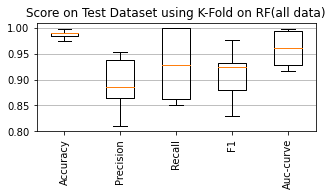

In [26]:
# BOX-PLOT for RF classifer on test sets
data = [scores_cv['accuracy'], scores_cv['precision'], scores_cv['recall'], scores_cv['f1-score'], scores_cv["auc"]]
f, ax1 =  plt.subplots(sharey=True, figsize=(5,2))
ax1.set_title('Score on Test Dataset using K-Fold on RF(all data)')
ax1.boxplot(data)
labels=["Accuracy","Precision", "Recall", "F1", "Auc-curve"]
ax1.set_xticklabels(labels, fontdict=None, minor=False, rotation=90)
ax1.yaxis.grid()
 

## Results (Dataset obtained using Random Forest Feature Selection)
For all the reduced datasets from Section 2, we run the two functions `cval_scores_SMOTE` and `boxplot_score` to obtain results - and graphical visualisation - of the scores obtained for each model, taking from two to five variables. 

N.B. It can be checked how SMOTE improves quality of performance by adding parameter **`Smote = False`** to the function `cval_scores_SMOTE` below.


In [27]:
# results using the the RF features selection methods

scores_rf, time_eval_rf, labels_rf =  cval_scores_SMOTE(X, y, models, "Random Forest")

** Feature Selection using Random Forest
 
Number of variables:  2
Model:  GaussianNB
Using the SMOTE function in the training set
Accuracy test: 0.959 (0.013)
Precision test: 0.654 (0.080)
Recall test: 0.950 (0.035)
F1-score test: 0.772 (0.057)
Auc test: 0.955 (0.017)
F2-score test: 0.868 (0.034)
Elapsed time to compute the prediction: 1.030 seconds
 
----------------------------------------------------
Number of variables:  2
Model:  LogisticRegression
Using the SMOTE function in the training set
Accuracy test: 0.962 (0.011)
Precision test: 0.678 (0.072)
Recall test: 0.931 (0.045)
F1-score test: 0.782 (0.053)
Auc test: 0.948 (0.023)
F2-score test: 0.864 (0.041)
Elapsed time to compute the prediction: 1.028 seconds
 
----------------------------------------------------
Number of variables:  2
Model:  DecisionTreeClassifier
Using the SMOTE function in the training set
Accuracy test: 0.965 (0.013)
Precision test: 0.718 (0.086)
Recall test: 0.866 (0.085)
F1-score test: 0.782 (0.075)
Auc 

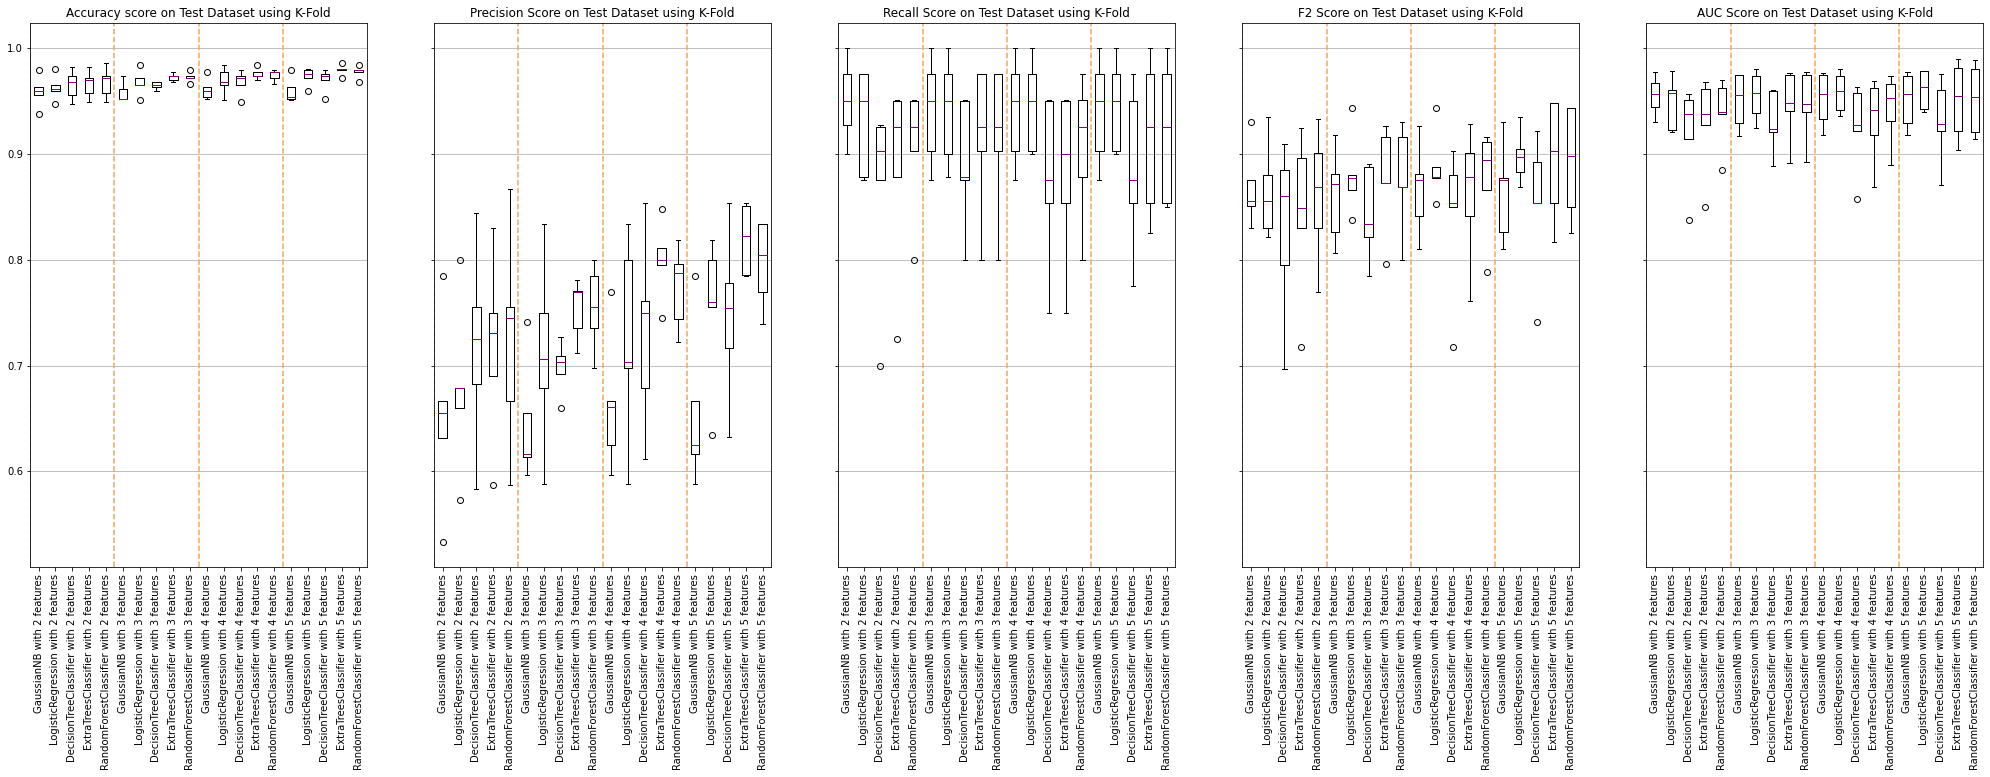

In [28]:
boxplot_score(scores_rf, labels_rf, nmaxvars, plot='All')

## Results (Dataset Obtained using RFE Feature Selection)

_N.B. The code for RFE takes a long time to run (estimated time = 8 minutes) since RFE Feature Selection algorithm is computationally expensive. This should not be a problem for predictive purposes since features, of course, will be selected just once._

_Also, our code is not optimized - a later development would be to optimize it to reduce computational times._

In [29]:
# results using the the RFE features selection methods
scores_rfe, time_eval_rfe, labels_rfe =  cval_scores_SMOTE(X, y, models, "RFE")

** Feature Selection using RFE
 
Number of variables:  2
Model:  GaussianNB
Using the SMOTE function in the training set
Accuracy test: 0.964 (0.007)
Precision test: 0.681 (0.052)
Recall test: 0.960 (0.025)
F1-score test: 0.795 (0.029)
Auc test: 0.962 (0.010)
F2-score test: 0.886 (0.012)
Elapsed time to compute the prediction: 26.113 seconds
 
----------------------------------------------------
Number of variables:  2
Model:  LogisticRegression
Using the SMOTE function in the training set
Accuracy test: 0.972 (0.010)
Precision test: 0.747 (0.074)
Recall test: 0.945 (0.043)
F1-score test: 0.831 (0.045)
Auc test: 0.960 (0.019)
F2-score test: 0.895 (0.029)
Elapsed time to compute the prediction: 26.588 seconds
 
----------------------------------------------------
Number of variables:  2
Model:  DecisionTreeClassifier
Using the SMOTE function in the training set
Accuracy test: 0.962 (0.012)
Precision test: 0.685 (0.077)
Recall test: 0.915 (0.052)
F1-score test: 0.780 (0.055)
Auc test: 0.

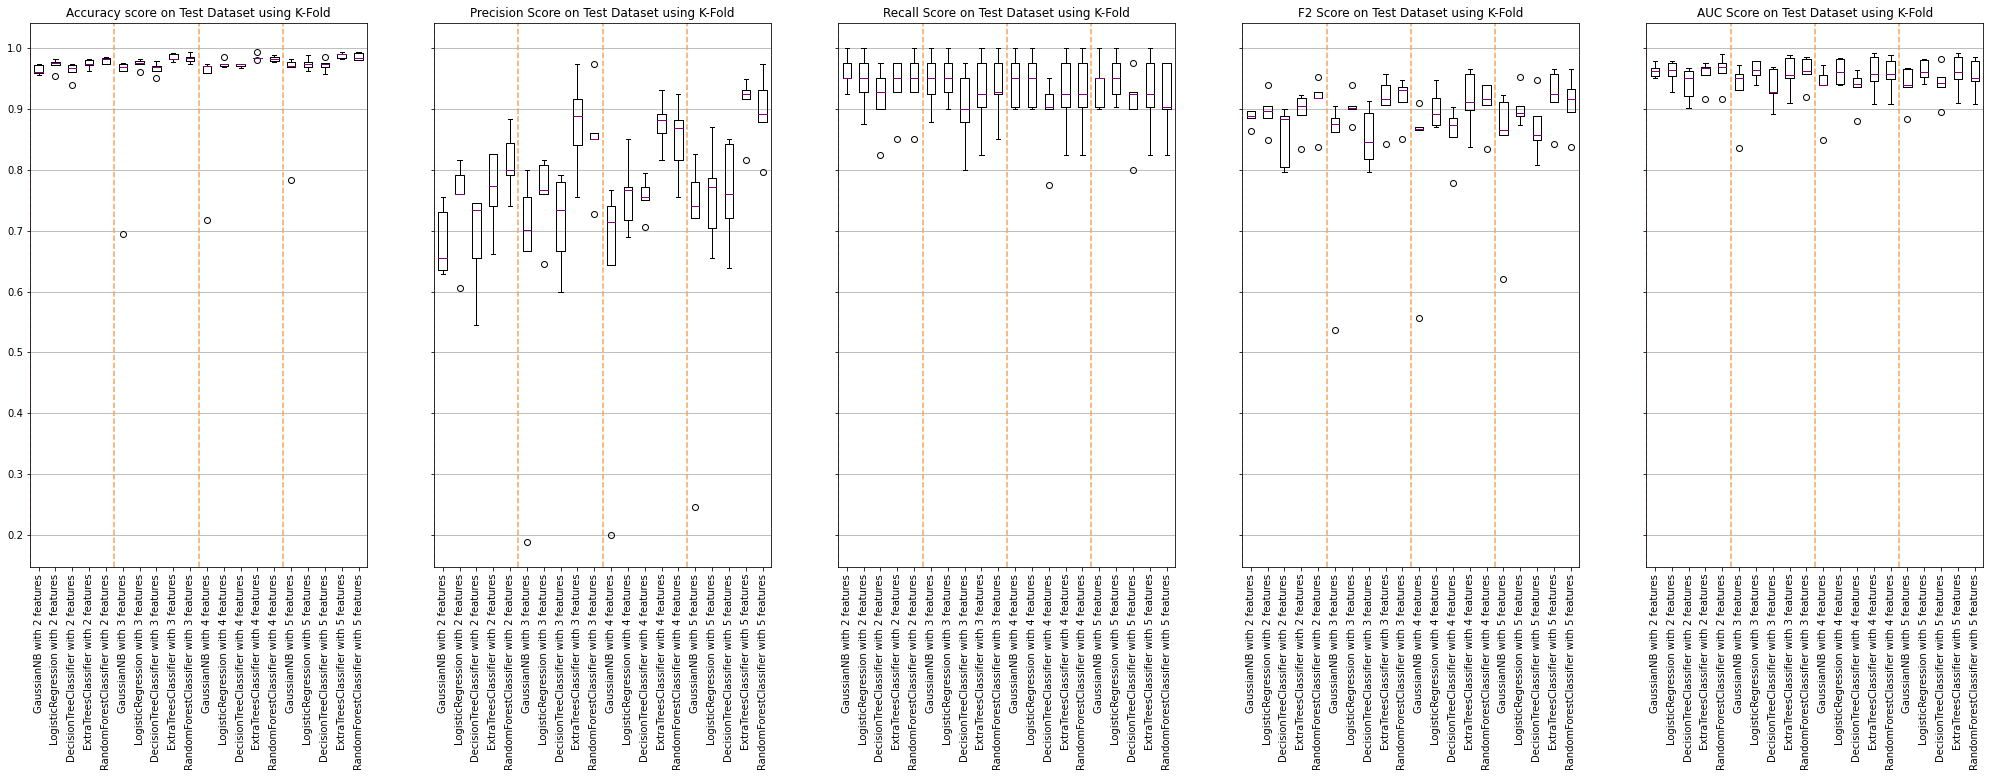

In [30]:
boxplot_score(scores_rfe, labels_rfe, nmaxvars)

## Results (Dataset Obtained Using Logistic Regression Feature Selection)

In [31]:
# results using the the Logistic Regression features selection methods
scores_lr, time_eval_lr, labels_lr =  cval_scores_SMOTE(X, y, models, "Logistic Regression")

** Feature Selection using Logistic Regression
 
Number of variables:  2
Model:  GaussianNB
Using the SMOTE function in the training set
Accuracy test: 0.960 (0.007)
Precision test: 0.653 (0.046)
Recall test: 0.945 (0.037)
F1-score test: 0.771 (0.035)
Auc test: 0.953 (0.018)
F2-score test: 0.866 (0.030)
Elapsed time to compute the prediction: 0.505 seconds
 
----------------------------------------------------
Number of variables:  2
Model:  LogisticRegression
Using the SMOTE function in the training set
Accuracy test: 0.962 (0.010)
Precision test: 0.673 (0.065)
Recall test: 0.931 (0.040)
F1-score test: 0.779 (0.049)
Auc test: 0.947 (0.020)
F2-score test: 0.862 (0.036)
Elapsed time to compute the prediction: 0.533 seconds
 
----------------------------------------------------
Number of variables:  2
Model:  DecisionTreeClassifier
Using the SMOTE function in the training set
Accuracy test: 0.972 (0.007)
Precision test: 0.773 (0.068)
Recall test: 0.876 (0.065)
F1-score test: 0.818 (0.042

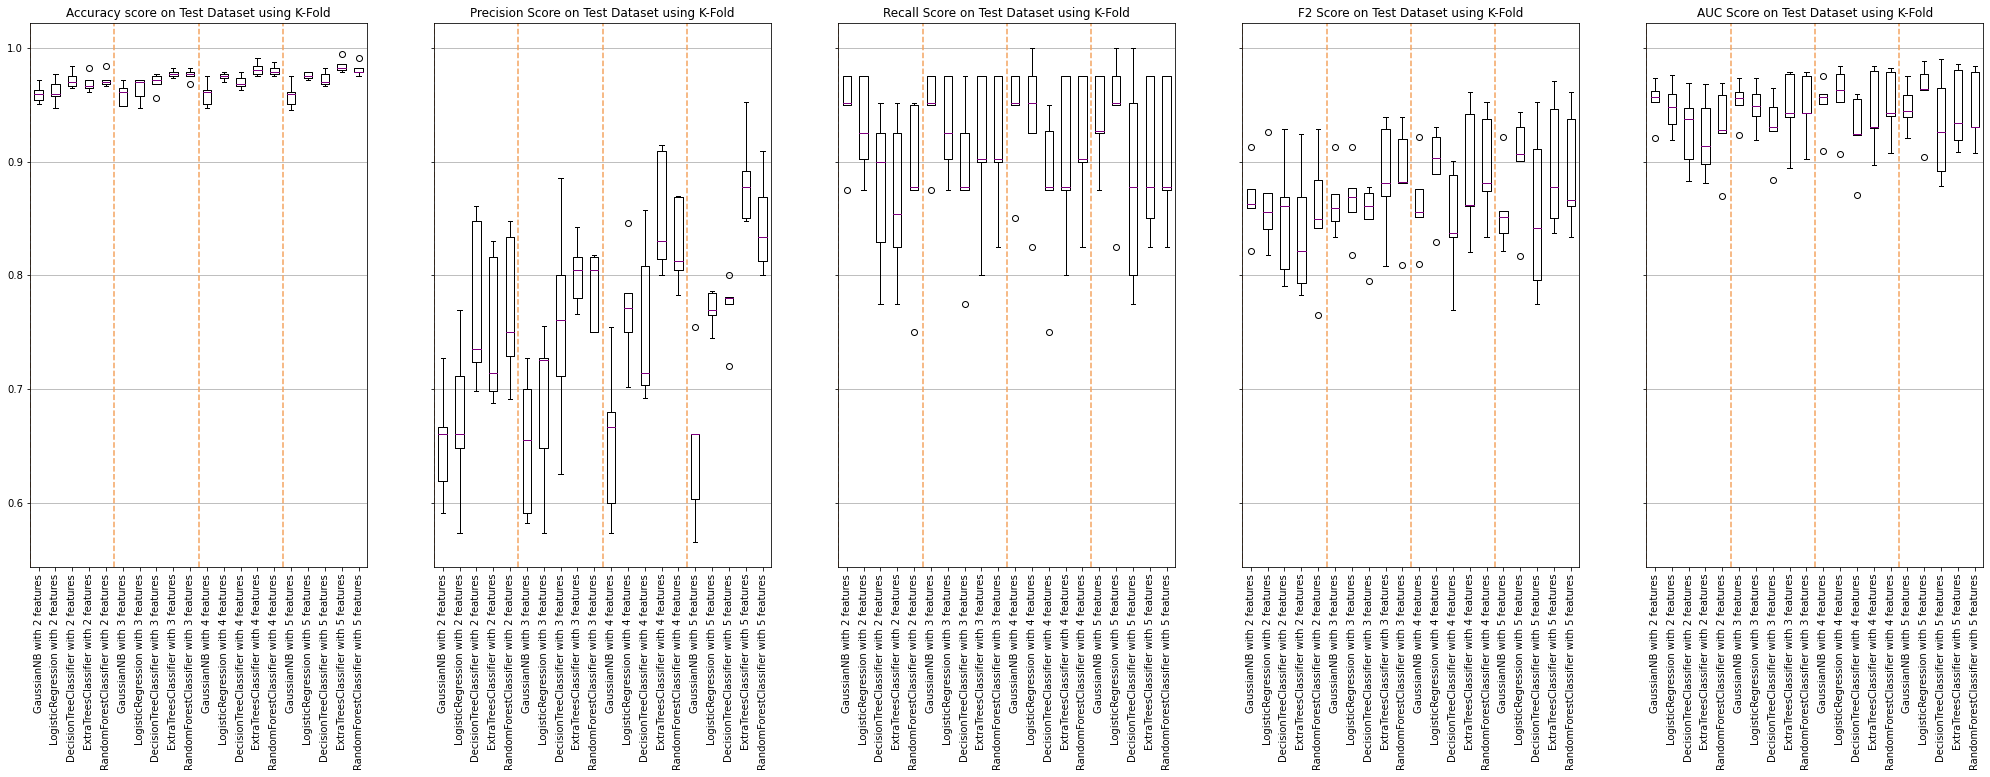

In [32]:
boxplot_score(scores_lr, labels_lr, nmaxvars)

## Results (PCA)

In [33]:
# results using PCA
scores_pca, time_eval_pca, labels_pca =  cval_scores_SMOTE(X, y, models, "PCA")

** Feature Selection using PCA
 
Number of variables:  2
Model:  GaussianNB
Using the SMOTE function in the training set
Accuracy test: 0.373 (0.044)
Precision test: 0.102 (0.006)
Recall test: 0.995 (0.010)
F1-score test: 0.186 (0.010)
Auc test: 0.660 (0.020)
F2-score test: 0.363 (0.015)
Elapsed time to compute the prediction: 0.131 seconds
 
----------------------------------------------------
Number of variables:  2
Model:  LogisticRegression
Using the SMOTE function in the training set
Accuracy test: 0.885 (0.019)
Precision test: 0.387 (0.043)
Recall test: 0.980 (0.019)
F1-score test: 0.554 (0.044)
Auc test: 0.929 (0.013)
F2-score test: 0.748 (0.033)
Elapsed time to compute the prediction: 0.130 seconds
 
----------------------------------------------------
Number of variables:  2
Model:  DecisionTreeClassifier
Using the SMOTE function in the training set
Accuracy test: 0.968 (0.007)
Precision test: 0.730 (0.033)
Recall test: 0.880 (0.094)
F1-score test: 0.797 (0.058)
Auc test: 0.92

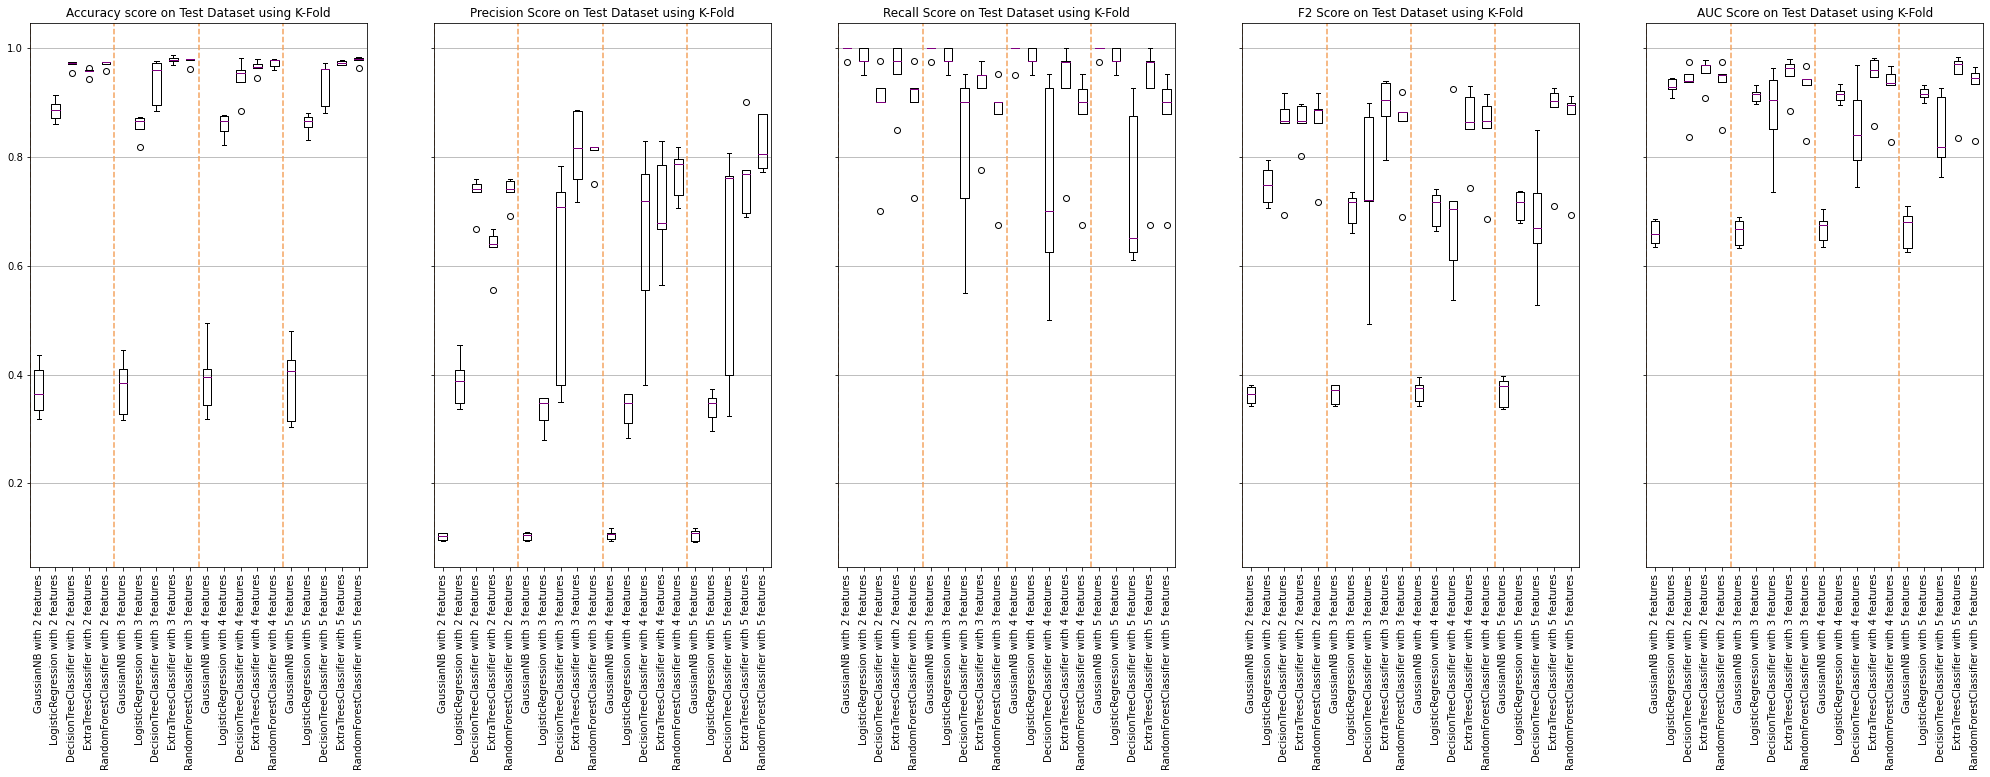

In [34]:
boxplot_score(scores_pca, labels_pca, nmaxvars)